# **1- PageRank via Power Method function**

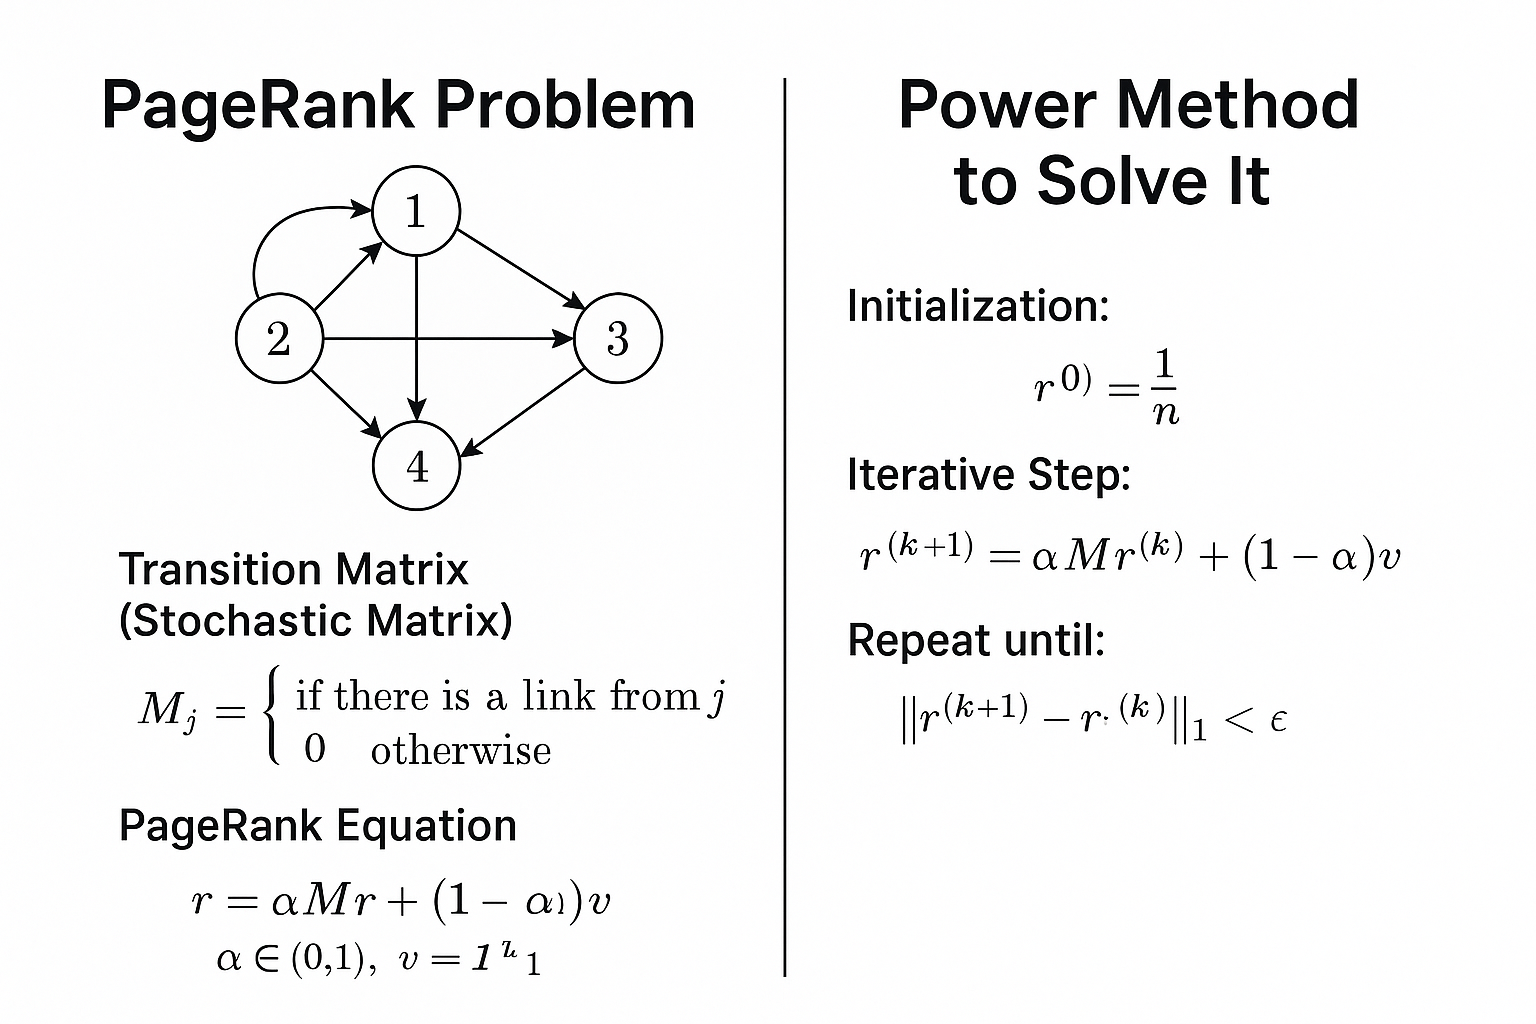

In [1]:
import numpy as np

def pagerank_power_method(adj_matrix, alpha=0.85, tol=1e-6, max_iter=100):
    n = adj_matrix.shape[0] # number of nodes
    out_degree = np.sum(adj_matrix, axis=1) #Compute out-degree

    M = adj_matrix / out_degree[:, None] #transition matrix M
    M = np.nan_to_num(M)  # Handle division by zero

    r = np.ones(n) / n # equal probability for each node -> uniform distribution
    for k in range(max_iter):
        r_new = alpha * M.T @ r + (1 - alpha) / n #Compute the new rank vector
        if np.linalg.norm(r_new - r, 1) < tol: #Check for convergenc
            break
        r = r_new
    return r, k


In [2]:
def pagerank_power_method_verbose(adj_matrix, alpha=0.85, tol=1e-6, max_iter=100):
    n = adj_matrix.shape[0]
    out_degree = np.sum(adj_matrix, axis=1)
    M = adj_matrix / out_degree[:, None]
    M = np.nan_to_num(M)

    r = np.ones(n) / n
    residuals = []

    for k in range(max_iter):
        r_new = alpha * M.T @ r + (1 - alpha) / n
        res = np.linalg.norm(r_new - r, 1)
        residuals.append((k, res))
        if res < tol:
            break
        r = r_new
    return r, k, residuals


# **2- expriment the code on a toy graph**

In [5]:
import csv

adj_matrix = np.array([
    [0, 0, 1, 1],  # Node 0 receives from 2 and 3
    [1, 0, 0, 0],  # Node 1 receives from 0
    [1, 1, 0, 1],  # Node 2 receives from 0, 1, 3
    [0, 0, 0, 0],  # Node 3 is a dangling node
])


_, _, residuals = pagerank_power_method_verbose(adj_matrix)

with open("residuals_toy_graph.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Iteration", "L1_Residual"])
    writer.writerows(residuals)

<ipython-input-4-bd89bf64d243>:22: RuntimeWarning: invalid value encountered in divide
  M = adj_matrix / out_degree[:, None]


# **3-implment on real dataset**

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

G = nx.karate_club_graph()
G = G.to_directed()
adj_matrix = nx.to_numpy_array(G)

start_time = time.time()
r, k, residuals = pagerank_power_method_verbose(adj_matrix)
end_time = time.time()

# **4-Plot Convergence Curve**

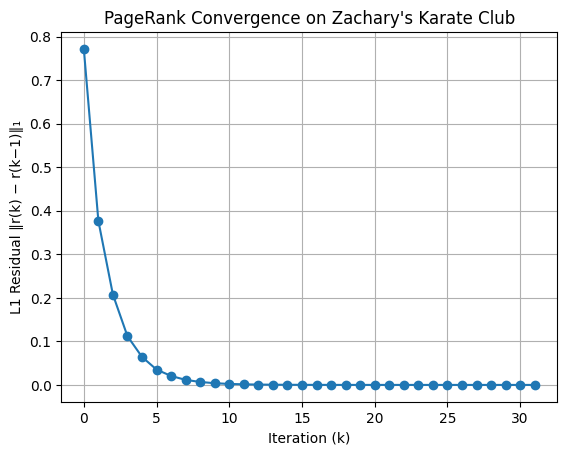

In [8]:
ks, res_vals = zip(*residuals)
plt.plot(ks, res_vals, marker='o')
plt.xlabel("Iteration (k)")
plt.ylabel("L1 Residual ∥r(k) − r(k−1)∥₁")
plt.title("PageRank Convergence")
plt.grid(True)
plt.show()

# **5-runtime and top-k ranked nodes**

In [9]:
print(f"Converged in {k} iterations")
print(f"Runtime: {end_time - start_time:.4f} seconds")

Converged in 31 iterations
Runtime: 0.0017 seconds


# **6-Top-5 nodes by rank**

In [10]:
top_indices = np.argsort(r)[::-1]
print("Top-5 Ranked Nodes:")
for i in range(5):
    print(f"Node {top_indices[i]}: PageRank = {r[top_indices[i]]:.4f}")

Top-5 Ranked Nodes:
Node 33: PageRank = 0.0970
Node 0: PageRank = 0.0885
Node 32: PageRank = 0.0759
Node 2: PageRank = 0.0628
Node 1: PageRank = 0.0574


# **7-Vary α and plot PageRank vectors or residual curves**

In [11]:
alphas = [0.6, 0.85, 0.95]
results = {}

for a in alphas:
    r, _, _ = pagerank_power_method_verbose(adj_matrix, alpha=a)
    results[a] = r

for a, r in results.items():
    print(f"Top Node for α={a}: {np.argmax(r)}, Score: {np.max(r)}")


Top Node for α=0.6: 33, Score: 0.08482056649013471
Top Node for α=0.85: 33, Score: 0.09698899023612746
Top Node for α=0.95: 33, Score: 0.10122323146686567
